# Latent Semantic Indexing  (潜在意味インデクシング)

単語文章行列`C`を、SVDを用いて小さい階数の行列で近似する。
クエリも同様に定数表現に書き換えることにより文章の類似度が計算可能となる。
この処理はLSIといsて知られている。

In [219]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [230]:
font = "/Library/Fonts/OsakaMono.ttf"
# http://ossipedia.ipa.go.jp/ipafont/index.html
prop = font_manager.FontProperties(fname=font)


In [34]:
C = np.array([
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1]
])


In [59]:
df = pd.DataFrame(C,columns=['d{i}'.format(i=i) for i in range(1,7)])
df.rename(index={ i:v for i, v in enumerate(['玉ねぎ', 'きのこ', '鶏肉', '卵', 'ホウレンソウ'])})
# let'say
# d1 is 親子丼 d2 is 鶏肉ときのこのソテー、 d3 オニンオン野菜 
# d4　ホウレンソウと卵の野菜炒め d5 卵焼き d6　ホウレンソウの胡麻和え

,d1,d2,d3,d4,d5,d6
玉ねぎ,1,0,1,0,0,0
きのこ,0,1,0,0,0,0
鶏肉,1,1,0,0,0,0
卵,1,0,0,1,1,0
ホウレンソウ,0,0,0,1,0,1


In [44]:
U,D,Vt = np.linalg.svd(C)
np.set_printoptions(3, suppress=True)
print("U:\n", U)
print("Σ:\n", np.diag(D))
print("Vt:\n", Vt)



U:
 [[ 0.44  -0.296 -0.569  0.577 -0.246]
 [ 0.129 -0.331  0.587  0.    -0.727]
 [ 0.476 -0.511  0.368  0.     0.614]
 [ 0.703  0.351 -0.155 -0.577 -0.16 ]
 [ 0.263  0.647  0.415  0.577  0.087]]
Σ:
 [[ 2.163  0.     0.     0.     0.   ]
 [ 0.     1.594  0.     0.     0.   ]
 [ 0.     0.     1.275  0.     0.   ]
 [ 0.     0.     0.     1.     0.   ]
 [ 0.     0.     0.     0.     0.394]]
Vt:
 [[ 0.749  0.28   0.204  0.447  0.325  0.121]
 [-0.286 -0.528 -0.186  0.626  0.22   0.406]
 [-0.28   0.749 -0.447  0.204 -0.121  0.325]
 [-0.     0.     0.577  0.    -0.577  0.577]
 [ 0.528 -0.286 -0.626 -0.186 -0.406  0.22 ]
 [ 0.    -0.    -0.    -0.577  0.577  0.577]]


上記のように、SVD(singular-value decomposition, 特異行列分解)をすると

- U:'玉ねぎ', 'きのこ', '鶏肉', '卵', 'ホウレンソウ'を行とするクエリ行列ができ
- Vt: 文書d1, d2...d6を列に持つ文書行列ができます。
- Σ:特異値

ここで、`Σ2`以降の対角要素は全て`0`にします。
`Σ2×Vt`をすると、文書行列Vtの3行目以降は全て`0`になるので、
無視できます。`Σ2`の低近似されたSVD:$C_{2} = U_{2}\sum_{2}V_{2}^{t}$を計算すると

In [47]:
np.diag(D)[:2]

array([[ 2.163,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.594,  0.   ,  0.   ,  0.   ]])

In [48]:
Vt[:2]

array([[ 0.749,  0.28 ,  0.204,  0.447,  0.325,  0.121],
       [-0.286, -0.528, -0.186,  0.626,  0.22 ,  0.406]])

In [49]:
U[:2]

array([[ 0.44 , -0.296, -0.569,  0.577, -0.246],
       [ 0.129, -0.331,  0.587,  0.   , -0.727]])

In [103]:
D2 = np.array([v if i < 2 else 0 for i,v in enumerate(D)])

In [110]:
U[:2]*(D[:2].dot(Vt[:2]))

ValueError: operands could not be broadcast together with shapes (2,5) (6,) 

In [147]:
(U.dot(np.diag(D2)))[:, :2].dot(Vt[:2])

array([[ 0.848,  0.516,  0.282,  0.13 ,  0.206, -0.076],
       [ 0.361,  0.358,  0.155, -0.206, -0.025, -0.18 ],
       [ 1.003,  0.718,  0.361, -0.051,  0.155, -0.206],
       [ 0.978,  0.13 ,  0.206,  1.029,  0.617,  0.411],
       [ 0.13 , -0.386, -0.076,  0.899,  0.411,  0.487]])

In [130]:
U.dot(np.diag(D2))

array([[ 0.952, -0.472,  0.   ,  0.   ,  0.   ],
       [ 0.28 , -0.528,  0.   ,  0.   ,  0.   ],
       [ 1.028, -0.815,  0.   ,  0.   ,  0.   ],
       [ 1.52 ,  0.559,  0.   ,  0.   ,  0.   ],
       [ 0.568,  1.031,  0.   ,  0.   ,  0.   ]])

In [160]:
C2 = np.dot(U[:,:2]*D[:2], Vt[:2])
C2

array([[ 0.848,  0.516,  0.282,  0.13 ,  0.206, -0.076],
       [ 0.361,  0.358,  0.155, -0.206, -0.025, -0.18 ],
       [ 1.003,  0.718,  0.361, -0.051,  0.155, -0.206],
       [ 0.978,  0.13 ,  0.206,  1.029,  0.617,  0.411],
       [ 0.13 , -0.386, -0.076,  0.899,  0.411,  0.487]])

In [165]:
np.linalg.norm(C-C2,'fro')
C1 = np.dot(U[:,:1]*D[:1], Vt[:1])
C1


array([[ 0.713,  0.266,  0.194,  0.425,  0.31 ,  0.116],
       [ 0.209,  0.078,  0.057,  0.125,  0.091,  0.034],
       [ 0.77 ,  0.288,  0.209,  0.459,  0.334,  0.125],
       [ 1.138,  0.425,  0.31 ,  0.679,  0.494,  0.185],
       [ 0.425,  0.159,  0.116,  0.254,  0.185,  0.069]])

In [168]:
np.linalg.norm(C-C1, 'fro') #frobenius

2.3072905296136073

In [169]:
truncated_SVD = lambda k: np.dot(U[:,:k]*D[:k], Vt[:k])

In [195]:
np.argmin([np.linalg.norm(C-truncated_SVD(k), 'fro') for k in range(1, D.size)])

3

In [199]:
np.linalg.norm(C-truncated_SVD(4), 'fro')

0.39391525049455717

In [204]:
U[:, :2]

array([[ 0.44 , -0.296],
       [ 0.129, -0.331],
       [ 0.476, -0.511],
       [ 0.703,  0.351],
       [ 0.263,  0.647]])

array([[ 0.749,  0.28 ,  0.204,  0.447,  0.325,  0.121],
       [-0.286, -0.528, -0.186,  0.626,  0.22 ,  0.406]])

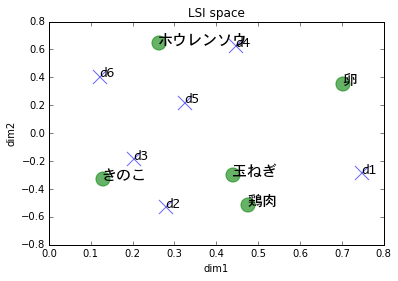

In [301]:
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('LSI space')
plt.scatter(U[:,0], U[:,1], color='g', s=200, alpha=0.6)
for i, ingredient in enumerate(['玉ねぎ', 'きのこ', '鶏肉', '卵', 'ホウレンソウ']):
    plt.annotate(ingredient, xy=(U[i,0],U[i,1]), fontproperties=prop,size='15')

plt.scatter(Vt[:2][0], Vt[:2][1], color='b', marker='x', s=200, alpha=0.6)
for i in range(6):
    plt.annotate("d{i}".format(i=i+1), xy=(Vt[:2][0][i],Vt[:2][1][i]), fontproperties=prop,size='15')


In [319]:
q = np.array([1, 0, 0, 1, 1, 0]) #醤油

In [328]:
q2 = np.dot(np.linalg.inv(np.diag(D[:2]))*U[:,:2].T, q)

ValueError: operands could not be broadcast together with shapes (2,2) (2,5) 

In [332]:
np.dot(np.linalg.inv(np.diag(D[:2])),U[:,:2].T)

array([[ 0.204,  0.06 ,  0.22 ,  0.325,  0.121],
       [-0.186, -0.208, -0.321,  0.22 ,  0.406]])

In [170]:
from sklearn.decomposition import TruncatedSVD

In [177]:
p = TruncatedSVD(2)

In [187]:
p.fit(C)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [139]:
A = np.array([
    [1, -1],
    [0, 1],
    [1, 0]
])

In [140]:
np.linalg.svd(A)

(array([[-0.816,  0.   , -0.577],
        [ 0.408, -0.707, -0.577],
        [-0.408, -0.707,  0.577]]),
 array([ 1.732,  1.   ]),
 array([[-0.707,  0.707],
        [-0.707, -0.707]]))